## Course: Machine learning(Data Science)
## Batch:september-1
## Name:Vasundhara G

# Project- Part A: Airbnb Price Prediction and Insights
### The primary objective of this project is to develop a regression model that predicts the price
### of an Airbnb listing. Using features such as property type, room type, number of reviews,
### location, and amenities, the model will aim to estimate the price accurately.

## 1) Import Necessary Libraries
In this section, we import essential libraries for data handling, visualization, preprocessing, and model development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



### 2) Load the Dataset
We load the Airbnb dataset to explore its structure and perform necessary preprocessing steps.

In [4]:
data = pd.read_excel('Airbnb_data 2.xlsx')

In [6]:
data

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews  review_scores_rating  \
0      Brooklyn Heights                 2                 100.0   
1        Hell's Kitchen                 6                  93.0   
2                Harlem                10                  92.0   
3          Lower Haight                 0                   NaN   
4      Columbia Heights                 4                  40.0   
...                 ...               ...                   ...   
74106      Williamsburg                 0                   NaN   
74107     Hermosa Beach                16                  93.0   
74108      Williamsburg                43     

### 3) Data Exploration
We inspect the dataset for missing values, outliers, and overall trends to understand key features.

In [9]:
data.shape               # dataset has 74111 rows and 29 columns

(74111, 29)

In [11]:
data.info()                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

### 4) Remove Unwanted Columns
Certain columns are dropped as they do not contribute significantly to price prediction.

In [14]:
data.drop(columns=["neighbourhood","number_of_reviews","thumbnail_url"],inplace=True)


In [16]:
data.drop(columns=['first_review', 'last_review'], inplace=True)

In [18]:
data.duplicated().sum()

0

### 5) Convert Data Type
Ensure the 'cleaning fee' column is correctly formatted as a numerical feature.

In [21]:
data["cleaning_fee"] = data["cleaning_fee"].astype("object")
#data["cleaning_fee"].value_counts()

In [23]:
data.info()                         #column "cleaning_fee" data type change to object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  object 
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-null

### 6) Handling Missing Values
We identify and fill missing values appropriately to prevent data loss.

In [26]:
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
latitude                      0
longitude                     0
name                         10
review_scores_rating      16722
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [28]:
data.head(5)

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy cleaning_fee  ... host_response_rate  \
0  Real Bed              strict         True  ...                NaN   
1  Real Bed              strict         True  ...                1.0   
2  Real Bed            moderate         True  ...                1.0   
3  Real Bed            flexible         True  ...                NaN   
4  Real Bed            moderate         True  ...                1.0   

            host_since instant_bookable   latitude   longitude  \
0           26-03-2012                f  40.696524  -73.991617   
1           19-06-2017                t  40.766115  -73.989040   
2           25-10-2016                t  40.808110  -73.943756   
3           19-04-2015                f  37.772004 -122.431619   
4  2015-01-03 00:00:00                t  38.925627  -77.034596   

                                       name review_scores_rating  zipcode  \
0            Beautiful brownstone 1-bedroom                100.0    11201   
1  Superb 3BR Apt Located Near Times Square                 93.0    10019   
2                          The Garden Oasis                 92.0    10027   
3        Beautiful Flat in the Heart of SF!                  NaN    94117   
4                Great studio in midtown DC                 40.0    20009   

   bedrooms beds  
0       1.0  1.0  
1       3.0  3.0  
2       1.0  3.0  
3       2.0  2.0  
4       0.0  1.0  

[5 rows x 24 columns]

### 7) Convert dataset coloumn into list and assign variable For that

In [31]:
col_list = list(data.columns)
col_list

['id',
 'log_price',
 'property_type',
 'room_type',
 'amenities',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'latitude',
 'longitude',
 'name',
 'review_scores_rating',
 'zipcode',
 'bedrooms',
 'beds']

### 8) Apply loop to fill null value

In [34]:
for col in col_list:
    if (data[col].dtype == "object") & (col != 'log_price'):
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

C:\Users\Admin\AppData\Local\Temp\ipykernel_3748\53876923.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


In [36]:
data.isnull().sum()                      # Indicate no null vale is here

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

### 9) Identifying Outliers
Outliers in the dataset are detected and removed to improve model performance.

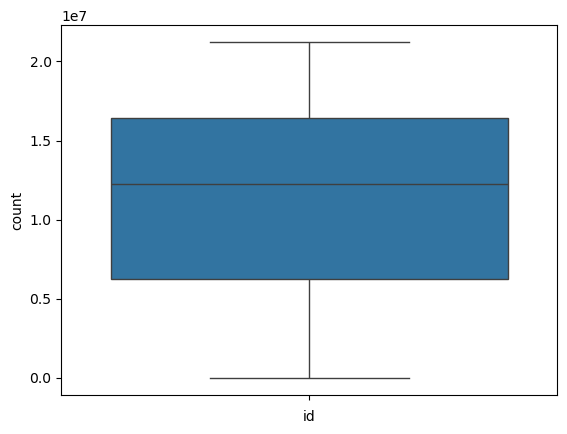

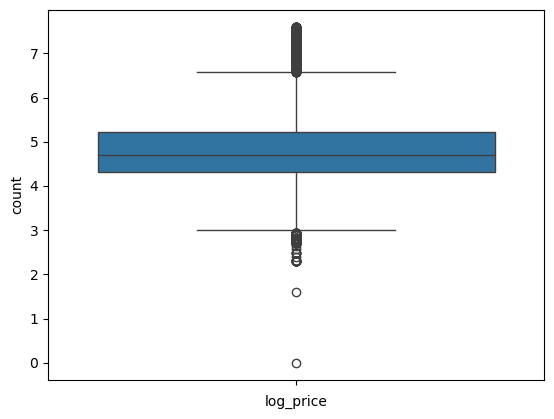

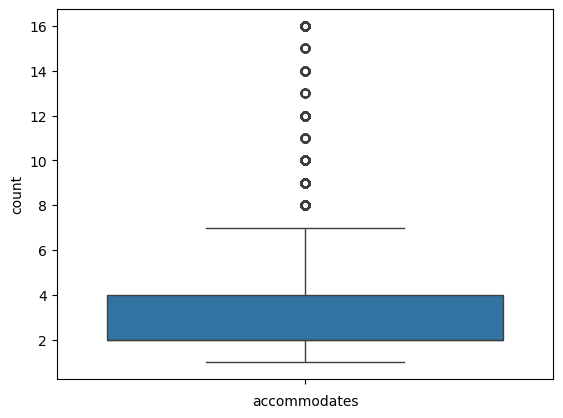

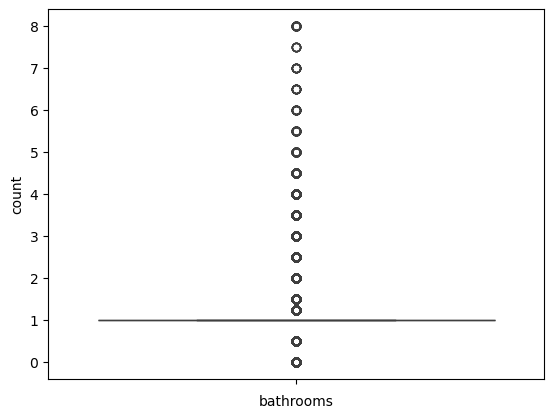

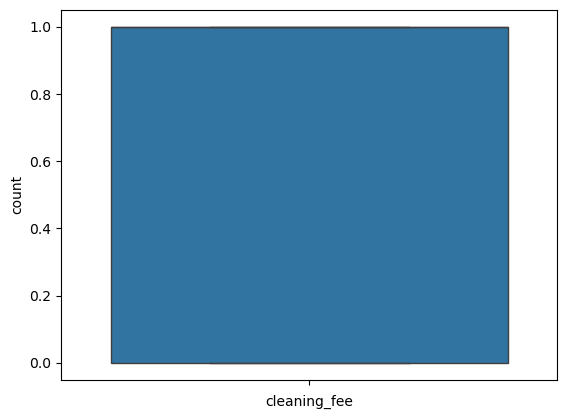

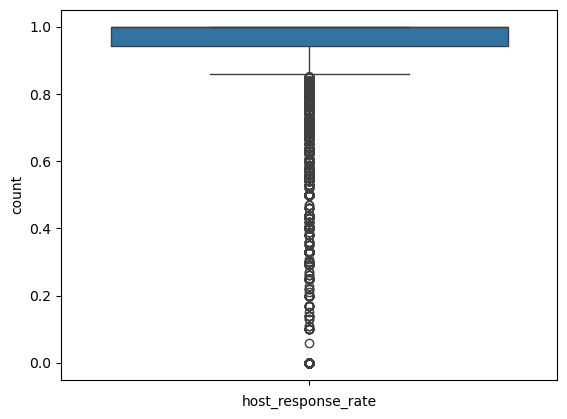

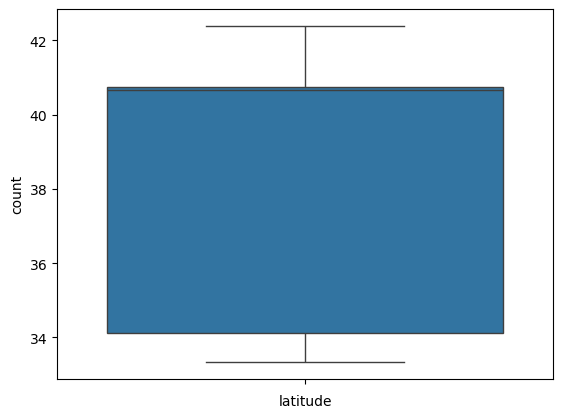

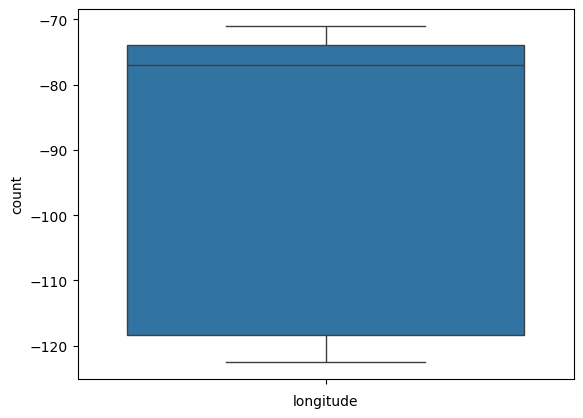

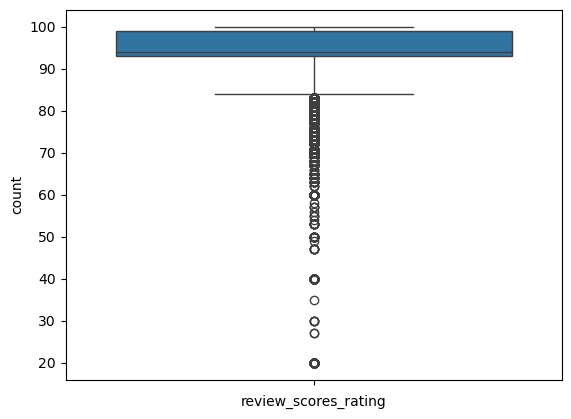

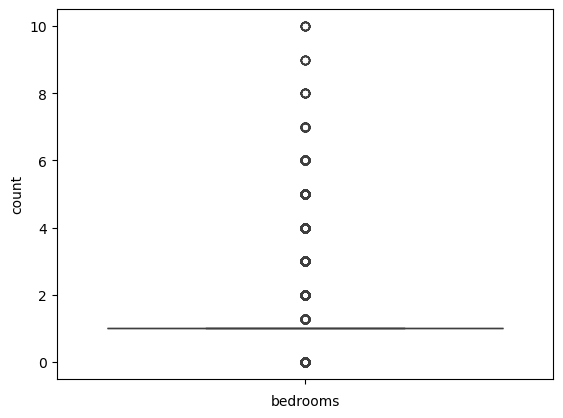

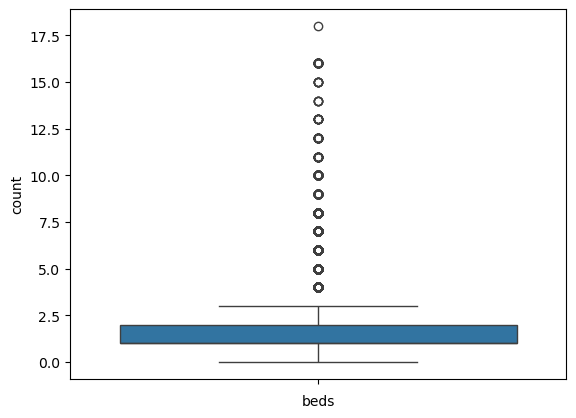

In [39]:
for col in col_list:
    if data[col].dtype != "object":                       # visual shows outliers in present
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

### 10) Removing Outliers
We eliminate extreme values that may skew our model predictions.

In [41]:
out_col = ["log_price","accommodates","bathrooms","host_response_rate","review_scores_rating","bedrooms","beds"]
for i in out_col:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    data = data[(data[i]<=upper) & (data[i]>= lower)]

## 12) Data Labeling

In [45]:
col_listm = []
for i in data.columns:
    if i != 'log_price':
        col_listm.append(i)
col_listm

['id',
 'property_type',
 'room_type',
 'amenities',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'latitude',
 'longitude',
 'name',
 'review_scores_rating',
 'zipcode',
 'bedrooms',
 'beds']

In [47]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

for i in col_listm:
    data[i]=data[i].astype(str)               #This line ensures that the data in the column i is converted to string type.
    data[i] = le.fit_transform(data[i])            #This is important because LabelEncoder works with string labels
    print(le.classes_)

['100002' '10000384' '10000523' ... '9999011' '9999220' '9999294']
['Apartment' 'Bed & Breakfast' 'Boat' 'Boutique hotel' 'Bungalow' 'Cabin'
 'Camper/RV' 'Castle' 'Cave' 'Chalet' 'Condominium' 'Dorm' 'Earth House'
 'Guest suite' 'Guesthouse' 'Hostel' 'House' 'Hut' 'In-law' 'Loft' 'Other'
 'Serviced apartment' 'Tent' 'Timeshare' 'Tipi' 'Townhouse' 'Train'
 'Treehouse' 'Vacation home' 'Villa' 'Yurt']
['Entire home/apt' 'Private room' 'Shared room']
['{"Air conditioning","Free parking on premises","Indoor fireplace",Heating,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,"Lock on bedroom door",Hangers,Iron,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}'
 '{"Air conditioning","Free parking on premises","Pets allowed",Breakfast,"Pets live on this property",Dog(s),Heating,"Family/kid friendly","Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire

### 13) Splitting the dataset in training

In [52]:
x = data[col_listm]

In [54]:
y = data["log_price"]

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state =500)

In [62]:
y_test

62350    5.010635
2909     4.304065
52533    5.075174
60134    5.293305
36520    4.682131
           ...   
795      5.192957
21286    4.317488
35493    5.521461
43173    3.828641
24138    3.637586
Name: log_price, Length: 5911, dtype: float64

### Identify categorical and numerical columns

In [65]:

categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(exclude=['object']).columns


### Preprocessing pipelines

In [68]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


### Define Models for Evaluation

In [71]:

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 ### Train and Evaluate Each Model

In [83]:
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(x_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    y_pred = pipeline.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE':rmse,'MAE': mae, 'R2 Score': r2}


### Model Evaluation
We evaluate the model using RMSE, MAE, and R² to measure accuracy and performance.

In [85]:
results_df = pd.DataFrame(results).T
print(results_df)


                       RMSE       MAE  R2 Score
Linear Regression  0.438062  0.338012  0.368712
Random Forest      0.438062  0.271470  0.563739
Gradient Boosting  0.364162  0.279454  0.550355
XGBoost            0.369706  0.269349  0.577308
SVR                0.358455  0.293694  0.500882
KNN                0.389515  0.335516  0.373577


In [ ]:

# Additional Data Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# 1. Histogram of Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Listing Prices')
plt.show()

# 2. Correlation Matrix Heatmap
plt.figure(figsize=(12,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# 3. Scatter plot of Price vs Number of Reviews
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['number_of_reviews'], y=data['price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs Number of Reviews')
plt.show()

# 4. Box Plot of Price by Room Type
plt.figure(figsize=(8,5))
sns.boxplot(x=data['room_type'], y=data['price'])
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Variation by Room Type')
plt.xticks(rotation=45)
plt.show()
